In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Out of 891 rows Cabin has 687 null values, Age has 177 null values and Embarked has 2 null values.

<AxesSubplot:>

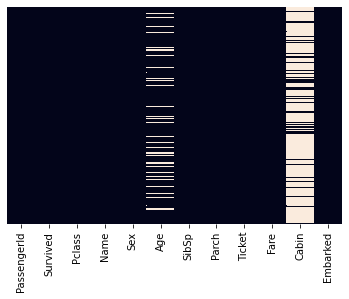

In [4]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

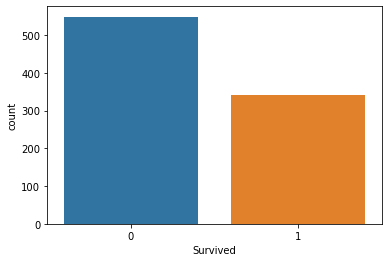

In [5]:
sns.countplot(x ='Survived', data = df)

0 indicates people who didnt survived and 1 indicates people who survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

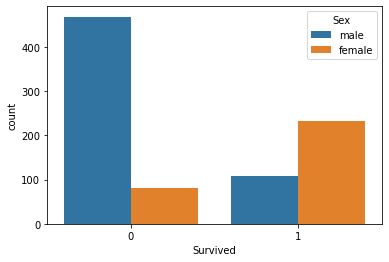

In [6]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df)

Count of survived peoples based on sex.

It can be seen clearly that majority of people who didn't survived are male.

<AxesSubplot:xlabel='Survived', ylabel='count'>

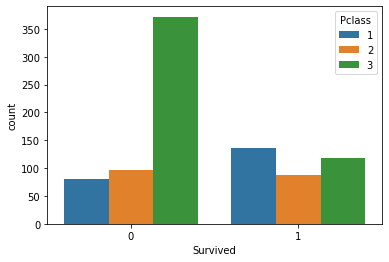

In [7]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df)

It is clear from the plot that majority of people who died are from Pclass = 3, while Pclass = 1 has least number of people who died.  

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Highest varience is seen in passengerID as it is a unique Id.

Secound is of Age range is approx(79)

Slight skewness can be seen in fare, age columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


All columns have appropriate datatypes, except age which is float it should be int64.

In [10]:
null_rows = (891-204)/891 * 100
null_rows

77.10437710437711

Percentage of null rows in cabin column is 77.1% which is a large percentage so it is better to drop cabin column.

In [11]:
df.drop('Cabin', axis = 1, inplace = True)

In [12]:
numerical_features = [i for i in df if df[i].dtypes!='O']
numerical_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [13]:
categorical_features = [i for i in df if df[i].dtypes=='O']
categorical_features

['Name', 'Sex', 'Ticket', 'Embarked']

<AxesSubplot:xlabel='Survived', ylabel='Age'>

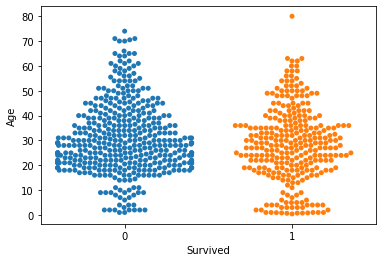

In [14]:
sns.swarmplot(x = 'Survived', y = 'Age', data = df)

Majority of people who didn't survived the Titanic range from 20-30 age group.

In [15]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Maximum number of people are in class-3 while least are in class-2

<AxesSubplot:xlabel='Pclass', ylabel='count'>

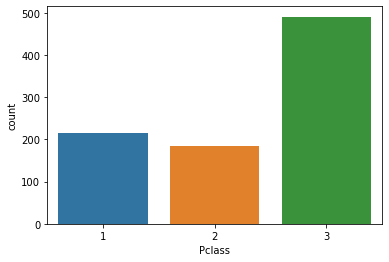

In [16]:
sns.countplot(x = 'Pclass', data = df)

Replacing Null Values

In [17]:
df['Embarked'] = np.where(df['Embarked'].isnull(), df['Embarked'].mode(), df['Embarked'])

In [18]:
df['Embarked'].isnull().sum()

0

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

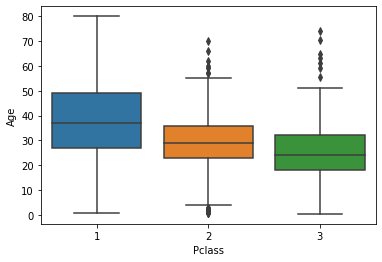

In [19]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df)

Approx. Average age in Pclass-1 is 38, 
 Approx. Average age in Pclass-2 is 30,
 Approx. Average age in Pclass-3 is 25.

In [20]:
df['Age'] = np.where(df['Age'].isnull(), df['Age'].median(), df['Age'])

In [21]:
df['Age'].isnull().sum()

0

Dropping both PassengerId and Name as both are unique.

In [22]:
df.drop(['PassengerId', 'Name'], axis = 1, inplace = True)

In [23]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Fare'>

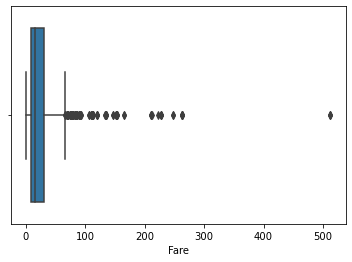

In [24]:
sns.boxplot(df['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

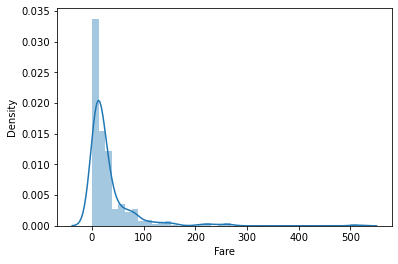

In [25]:
sns.distplot(df['Fare'], bins=40)

Replacing values greater than 100 with median.

In [26]:
df['Fare'] = np.where(df['Fare']>100, df['Fare'].median(), df['Fare'])

<AxesSubplot:xlabel='Age'>

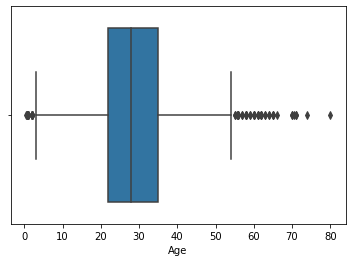

In [27]:
sns.boxplot(df['Age'])

Keeping the values as age of people can be 60-80 years.

<AxesSubplot:>

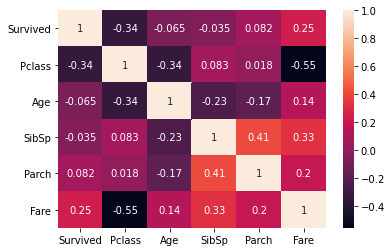

In [28]:
sns.heatmap(df.corr(), annot = True) 

In [29]:
df['Age'].skew()

0.5102446555756495

In [30]:
df['Fare'].skew()

1.7682149194660524

In [31]:
df['Fare'] = np.sqrt(df['Fare'])

In [32]:
df['Fare'].skew()

0.9797120923424475

In [33]:
df['Fare_new'] = np.sqrt(df['Fare'])

In [34]:
df['Fare_new'].skew()

-0.5302223058210567

Skewness is now removed.

In [35]:
df.drop('Fare', axis = 1, inplace = True)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [38]:
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [39]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

There are 577 males and 314 females on the ship.

In [40]:
df['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked,Fare_new
0,0,3,1,22.0,1,0,A/5 21171,2,1.640909
1,1,1,0,38.0,1,0,PC 17599,0,2.905674
2,1,3,0,26.0,0,0,STON/O2. 3101282,2,1.677837
3,1,1,0,35.0,1,0,113803,2,2.699440
4,0,3,1,35.0,0,0,373450,2,1.684414


Dropping ticket column as it has all unique values.

In [42]:
df.drop('Ticket', axis = 1, inplace = True)

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [44]:
df_new = pd.DataFrame(sc.fit_transform(df), columns = df.columns)

In [45]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_new
0,-0.789272,0.827377,0.737695,-0.565736,0.432793,-0.473674,0.585954,-0.773636
1,1.266990,-1.566107,-1.355574,0.663861,0.432793,-0.473674,-1.942303,1.855406
2,1.266990,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,0.585954,-0.696874
3,1.266990,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.585954,1.426710
4,-0.789272,0.827377,0.737695,0.433312,-0.474545,-0.473674,0.585954,-0.683202


Seperating target and indepedent variable.

In [46]:
x = df_new.drop('Survived', axis = 1)

In [47]:
y = df['Survived']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [49]:
for i in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = i)
    lr =  LogisticRegression()
    lr.fit(x_train, y_train)
    pred_test = lr.predict(x_test)
    pred_train = lr.predict(x_train)
    if(round(accuracy_score(pred_test, y_test) * 100, 1) == round(accuracy_score(pred_train, y_train) * 100, 1)):
        print('random state', i)
        print('test accuracy', accuracy_score(pred_test, y_test))
        print('train accuracy', accuracy_score(pred_train, y_train))

random state 57
test accuracy 0.8
train accuracy 0.8003355704697986
random state 102
test accuracy 0.7966101694915254
train accuracy 0.7969798657718121
random state 119
test accuracy 0.7966101694915254
train accuracy 0.7969798657718121
random state 263
test accuracy 0.7966101694915254
train accuracy 0.7969798657718121
random state 294
test accuracy 0.7966101694915254
train accuracy 0.7969798657718121
random state 338
test accuracy 0.7966101694915254
train accuracy 0.7969798657718121
random state 360
test accuracy 0.7966101694915254
train accuracy 0.7969798657718121
random state 420
test accuracy 0.8
train accuracy 0.8003355704697986
random state 484
test accuracy 0.7966101694915254
train accuracy 0.7969798657718121
random state 584
test accuracy 0.7966101694915254
train accuracy 0.7969798657718121
random state 759
test accuracy 0.7898305084745763
train accuracy 0.790268456375839
random state 782
test accuracy 0.8
train accuracy 0.8003355704697986
random state 817
test accuracy 0.8
trai

Taking random state as 57 for splitting the data.

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 57)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [52]:
algo = [DecisionTreeClassifier, SVC, KNeighborsClassifier, LogisticRegression]

In [53]:
for i in algo:
    obj = i()
    obj.fit(x_train, y_train)
    pred = obj.predict(x_test)
    print(i, 'accuracy_score', accuracy_score(y_test, pred))
    print('confusion_matrix', confusion_matrix(y_test, pred))
    print('classification_report', classification_report(y_test, pred))
    print('-------------------------------------------------------------')

<class 'sklearn.tree._classes.DecisionTreeClassifier'> accuracy_score 0.8135593220338984
confusion_matrix [[151  30]
 [ 25  89]]
classification_report               precision    recall  f1-score   support

           0       0.86      0.83      0.85       181
           1       0.75      0.78      0.76       114

    accuracy                           0.81       295
   macro avg       0.80      0.81      0.80       295
weighted avg       0.82      0.81      0.81       295

-------------------------------------------------------------
<class 'sklearn.svm._classes.SVC'> accuracy_score 0.8203389830508474
confusion_matrix [[163  18]
 [ 35  79]]
classification_report               precision    recall  f1-score   support

           0       0.82      0.90      0.86       181
           1       0.81      0.69      0.75       114

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.80       295
weighted avg       0.82      0.82      0.82       295

--

Applying Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
svm = SVC()

In [56]:
for i in range(2,21):
    svm.fit(x_train, y_train)
    pred = obj.predict(x_test)
    print('accuracy_score', accuracy_score(y_test, pred))
    cross_score = cross_val_score(lr, x, y, cv = i)
    print('cv. ', i)
    print(cross_score.mean())
    print('-------')

accuracy_score 0.8
cv.  2
0.7845165516198922
-------
accuracy_score 0.8
cv.  3
0.7845117845117845
-------
accuracy_score 0.8
cv.  4
0.7845210681533552
-------
accuracy_score 0.8
cv.  5
0.7867679367271357
-------
accuracy_score 0.8
cv.  6
0.7788938267126185
-------
accuracy_score 0.8
cv.  7
0.7822781917885264
-------
accuracy_score 0.8
cv.  8
0.7878659909909911
-------
accuracy_score 0.8
cv.  9
0.7811447811447811
-------
accuracy_score 0.8
cv.  10
0.7878776529338328
-------
accuracy_score 0.8
cv.  11
0.78675645342312
-------
accuracy_score 0.8
cv.  12
0.7901201201201201
-------
accuracy_score 0.8
cv.  13
0.7901009902288675
-------
accuracy_score 0.8
cv.  14
0.7845273526077098
-------
accuracy_score 0.8
cv.  15
0.7867419962335217
-------
accuracy_score 0.8
cv.  16
0.7879058441558442
-------
accuracy_score 0.8
cv.  17
0.7900836677196277
-------
accuracy_score 0.8
cv.  18
0.7889342403628118
-------
accuracy_score 0.8
cv.  19
0.7890598373825405
-------
accuracy_score 0.8
cv.  20
0.787853535

Accuracy is same with very less cv mean difference.

Taking 6 as the best cv fold.

In [57]:
for i in algo:
    obj = i()
    obj.fit(x_train, y_train)
    pred = obj.predict(x_test)
    cross_score = cross_val_score(obj, x, y, cv = 6)
    print('cross score', cross_score.mean())
    print(i, 'accuracy_score', accuracy_score(y_test, pred))
    print('confusion_matrix', confusion_matrix(y_test, pred))
    print('classification_report', classification_report(y_test, pred))
    print('-------------------------------------------------------------')

cross score 0.767685470705605
<class 'sklearn.tree._classes.DecisionTreeClassifier'> accuracy_score 0.8067796610169492
confusion_matrix [[149  32]
 [ 25  89]]
classification_report               precision    recall  f1-score   support

           0       0.86      0.82      0.84       181
           1       0.74      0.78      0.76       114

    accuracy                           0.81       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295

-------------------------------------------------------------
cross score 0.8193134409577363
<class 'sklearn.svm._classes.SVC'> accuracy_score 0.8203389830508474
confusion_matrix [[163  18]
 [ 35  79]]
classification_report               precision    recall  f1-score   support

           0       0.82      0.90      0.86       181
           1       0.81      0.69      0.75       114

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.80       

SVC is giving best results.

Applying GridSearchCV.....

In [58]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],   
              'kernel': ['rbf', 'poly', 'linear']}

In [59]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(svm, param_grid, refit = True, scoring='accuracy') 

In [60]:
grid.fit(x, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='accuracy')

In [61]:
best_para = grid.best_params_
print(best_para)
best_res = grid.best_score_
print(best_res)

{'C': 1, 'kernel': 'rbf'}
0.8249074132195091


In [62]:
svc_obj = SVC(C=1, kernel = 'rbf')
svc_obj.fit(x_train, y_train)
pred = svc_obj.predict(x_test)

In [63]:
print('accuracy_score', accuracy_score(y_test, pred))
print('confusion_matrix', confusion_matrix(y_test, pred))
print('classification_report', classification_report(y_test, pred))

accuracy_score 0.8203389830508474
confusion_matrix [[163  18]
 [ 35  79]]
classification_report               precision    recall  f1-score   support

           0       0.82      0.90      0.86       181
           1       0.81      0.69      0.75       114

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.80       295
weighted avg       0.82      0.82      0.82       295



Saving best Model

In [64]:
import pickle
titanic= 'pickl_t.pkl'
pickle.dump(svc_obj, open(titanic, 'wb'))

Conclusion....

In [65]:
original_res = np.array(y_test)
pred_res = np.array(svc_obj.predict(x_test))
df_comparison = pd.DataFrame({'Original':pred_res, 'Predicted':pred_res})
df_comparison

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
290,1,1
291,0,0
292,0,0
293,0,0
